In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 9.0MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 1.8MB 17.0MB/s 
     |████████████████████████████████| 276kB 48.0MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 245kB 38.9MB/s 
     |████████████████████████████████| 14.2MB 238kB/s 
     |████████████████████████████████| 6.8MB 45.1MB/s 
     |████████████████████████████████| 215kB 56.7MB/s 
     |████████████████████████████████| 1.7MB 34.2MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 43.2MB/s 
     |████████████████████████████████| 1.1MB 46.0MB/s 
     |████████████████████████████████| 163kB 49.9MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 1.1MB 37.3MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 153kB 40.2MB/s 
  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.read_csv('/content/Lead_Scoring.csv')
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
dataset.shape

(9240, 37)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
data = dataset.sample(frac=0.70, random_state=42)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (6468, 37)


In [ ]:
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Unseen Data For Predictions: (2772, 37)


In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = data, target = 'Converted', session_id=1)

,Description,Value
0,session_id,1
1,Target,Converted
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(6468, 37)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9452,0.9844,0.9192,0.9387,0.9286,0.8842,0.8846,0.637
gbc,Gradient Boosting Classifier,0.9432,0.9825,0.8981,0.9532,0.9246,0.8792,0.8805,19.381
ada,Ada Boost Classifier,0.9382,0.9809,0.8999,0.9392,0.9187,0.8689,0.8698,5.300
rf,Random Forest Classifier,0.9340,0.9753,0.8816,0.9448,0.9120,0.8592,0.8607,4.578
dt,Decision Tree Classifier,0.9326,0.9272,0.9027,0.9223,0.9121,0.8575,0.8579,1.077
et,Extra Trees Classifier,0.9315,0.9735,0.8788,0.9412,0.9087,0.8540,0.8555,5.999
nb,Naive Bayes,0.8383,0.8964,0.8099,0.7819,0.7955,0.6619,0.6624,0.382
lr,Logistic Regression,0.7139,0.6368,0.4792,0.6889,0.5650,0.3621,0.3754,1.574
ridge,Ridge Classifier,0.7108,0.0000,0.4718,0.6849,0.5581,0.3542,0.3680,19.719
knn,K Neighbors Classifier,0.6835,0.7014,0.5464,0.6026,0.5726,0.3223,0.3237,3.415


In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9581,0.9874,0.9432,0.9486,0.9459,0.9116,0.9116
1,0.9426,0.9746,0.9318,0.9213,0.9266,0.8795,0.8795
2,0.9470,0.9887,0.9148,0.9471,0.9306,0.8878,0.8881
3,0.9404,0.9877,0.8864,0.9571,0.9204,0.8728,0.8745
4,0.9448,0.9871,0.8977,0.9576,0.9267,0.8825,0.8837
5,0.9404,0.9818,0.8977,0.9461,0.9213,0.8734,0.8742
6,0.9448,0.9810,0.9432,0.9171,0.9300,0.8844,0.8847
7,0.9336,0.9816,0.9029,0.9240,0.9133,0.8595,0.8597
8,0.9336,0.9804,0.9086,0.9191,0.9138,0.8598,0.8599
9,0.9668,0.9941,0.9657,0.9494,0.9575,0.9303,0.9304


In [ ]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
 # Applying hyperparameter tuning

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9581,0.9869,0.9489,0.9435,0.9462,0.9118,0.9118
1,0.9338,0.9701,0.9148,0.9148,0.9148,0.8606,0.8606
2,0.9426,0.9886,0.9091,0.9412,0.9249,0.8784,0.8788
3,0.9382,0.9826,0.8920,0.9458,0.9181,0.8686,0.8695
4,0.9536,0.9874,0.9091,0.9697,0.9384,0.9013,0.9025
5,0.9338,0.9801,0.8864,0.9398,0.9123,0.8592,0.8601
6,0.9338,0.9788,0.9091,0.9195,0.9143,0.8603,0.8604
7,0.9358,0.9795,0.9200,0.9148,0.9174,0.8649,0.8649
8,0.9403,0.9851,0.9086,0.9353,0.9217,0.8735,0.8737
9,0.9668,0.9933,0.9600,0.9545,0.9573,0.9301,0.9302


In [ ]:
# plot roc-auc curve for lightgbm 

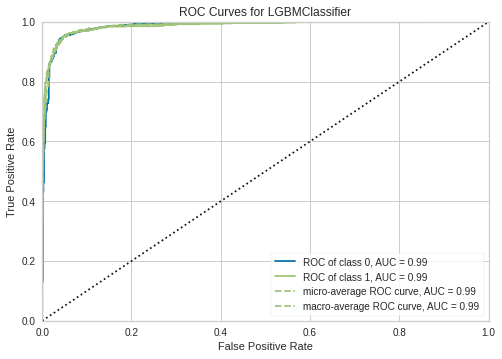

In [ ]:
plot_model(tuned_lightgbm, plot = 'auc')

In [ ]:
# feature importance

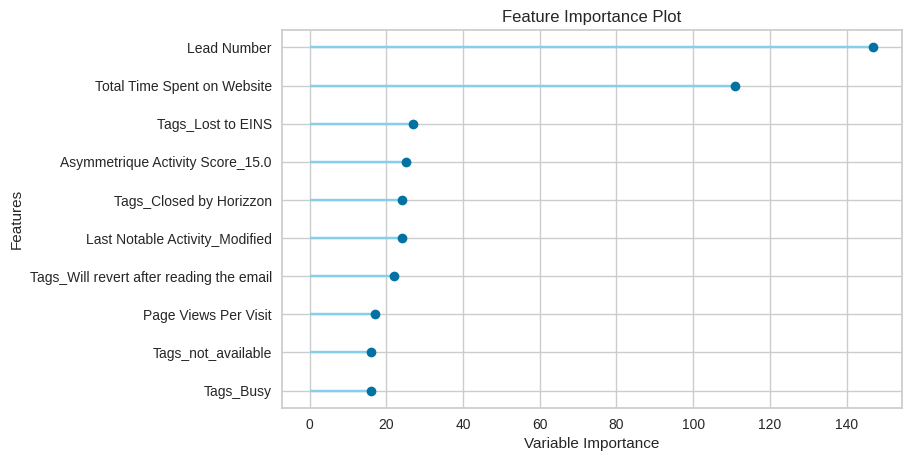

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

The variable importance of Lead Number is the highest. Lead number is the number assigned to each lead provided.

In [ ]:
# precision recall curve

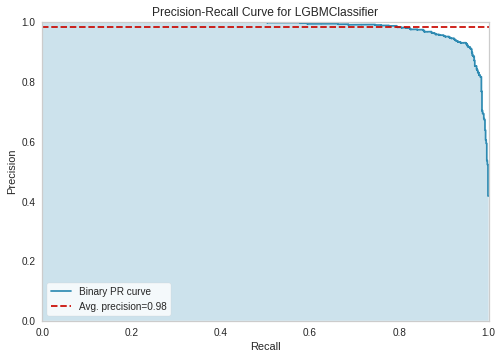

In [ ]:
plot_model(tuned_lightgbm, plot = 'pr')

In [ ]:
# confusion matrix

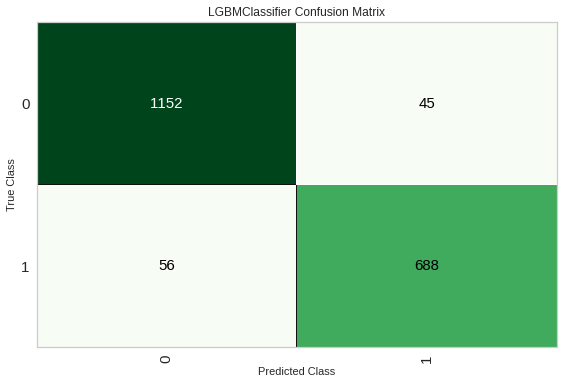

In [ ]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.948,0.9862,0.9247,0.9386,0.9316,0.8896,0.8897


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID_000104b9-23e4-4ddc-8caa-8629fe8ad7f4,Prospect ID_0011be30-fa97-465b-8e44-0ae83dff7eed,Prospect ID_001b0ad3-9096-4af8-8205-912f5c6dafd8,Prospect ID_002233e4-c3d5-4a78-b64e-fa9b7fdef393,Prospect ID_0027a9f7-64d9-4f1f-b80c-977527a2e325,Prospect ID_0033009e-57b0-46c7-b84d-2027ce70f1cd,Prospect ID_003c30fe-1ffe-4ba3-90fa-27a519325851,Prospect ID_00408992-f4a1-4211-9058-e03c4a7851c8,Prospect ID_0044c980-284a-4dbe-8d01-31f614bc7e38,Prospect ID_0047078f-6471-4731-a451-3eca132691d2,Prospect ID_005712ed-e705-4ab8-8287-26190f0d9309,Prospect ID_006abec4-ad87-45bd-8e04-c22edb6279c7,Prospect ID_009cb4b9-cd0b-4e5e-9f7d-500a63c49981,Prospect ID_00abd8bd-47c1-4d5b-8f48-ecce4d6294ed,Prospect ID_00b24e92-7bcf-495d-a130-fc6b501ecad7,Prospect ID_00c517fa-82ef-49f6-b68d-b925de3a5423,Prospect ID_00d914d6-6588-4686-9c63-0049dbb8260c,Prospect ID_00dbf55e-899a-42c9-9e2c-244829923138,Prospect ID_00fd9191-ba69-48be-8f21-e50b89802b0b,Prospect ID_013a035d-72c5-4277-be61-27550621c4d2,Prospect ID_01484537-8dfa-42db-94a6-52d8cf313c2e,Prospect ID_01638a1b-677b-4de9-83b6-a67a9004a4aa,Prospect ID_016fa193-dd06-4cc1-94d2-413dabda57d8,Prospect ID_017e2844-cdde-41d0-ba20-da863968dcbd,Prospect ID_01869caf-451c-43b8-9a05-ffdea2627fe2,Prospect ID_01975c4a-7426-4e89-9a23-3d4006f15f02,Prospect ID_01a35f67-534c-436f-852f-e9edb7fc4d9c,Prospect ID_01ade6a5-8289-49f6-9b31-da56f39664be,Prospect ID_01b01543-5f22-4bbe-a8c0-178cfd209926,Prospect ID_01b4071a-a908-4e84-b24a-c8a5e8111d7a,Prospect ID_01b9f473-3609-4846-a0e4-ddcd1f6170ae,Prospect ID_01ca067f-a6a4-4ce3-9f88-df4898ea8288,Prospect ID_01cb6c3a-4870-4d8e-ab0c-0ec09dfa08bb,Prospect ID_01d0e5ed-bd8c-4b0d-a33f-7d59dc0fc528,Prospect ID_01d6d18a-39e3-48de-9e93-2ec63b2ace60,Prospect ID_01ded72f-1d7f-435d-9076-b03df8e3fc96,...,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Activity Score_10.0,Asymmetrique Activity Score_11.0,Asymmetrique Activity Score_12.0,Asymmetrique Activity Score_13.0,Asymmetrique Activity Score_14.0,Asymmetrique Activity Score_15.0,Asymmetrique Activity Score_16.0,Asymmetrique Activity Score_17.0,Asymmetrique Activity Score_18.0,Asymmetrique Activity Score_8.0,Asymmetrique Activity Score_9.0,Asymmetrique Profile Score_12.0,Asymmetrique Profile Score_13.0,Asymmetrique Profile Score_14.0,Asymmetrique Profile Score_15.0,Asymmetrique Profile Score_16.0,Asymmetrique Profile Score_17.0,Asymmetrique Profile Score_18.0,Asymmetrique Profile Score_19.0,Asymmetrique Profile Score_20.0,I agree to pay the amount through cheque_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Converted,Label,Score
0,658222.0,2.0,1509.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8673
1,608261.0,6.0,1197.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9946
2,628706.0,2.0,279.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# Validating the model on the unseen data

In [ ]:
unseen_predictions = predict_model(tuned_lightgbm, data=data_unseen)
unseen_predictions.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Label,Score
0,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0.9654
1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0.9961
2,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,0.9820
3,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified,0,0.9906
4,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened,0,0.9849


In [ ]:
unseen_predictions.shape

(2772, 39)

In [ ]:
# Checking the Accuracy on unseen data

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Converted'], unseen_predictions['Label'], metric = 'Accuracy')

0.9455

In [ ]:
save_model(tuned_lightgbm,'./model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Converted',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.3,
                                 max_depth=-1,

In [ ]:
saved_final_lightgbm_model = load_model('./model')

Transformation Pipeline and Model Successfully Loaded
